In [83]:
import pandas as pd
import seaborn as sns

In [84]:
benchmark = pd.read_csv('modifiable-benchmark.csv')
benchmark.insert(1, 'Path Present', benchmark['Path Length'] != 0, True)
benchmark.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            4000 non-null   object 
 1   Path Present         4000 non-null   bool   
 2   Path Length          4000 non-null   int64  
 3   Duration (µs)        4000 non-null   float64
 4   Average Degree       4000 non-null   float64
 5   Average Path Degree  4000 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 160.3+ KB


In [85]:
benchmark_path = benchmark[benchmark['Path Present']]
benchmark_path.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3984 entries, 0 to 3999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            3984 non-null   object 
 1   Path Present         3984 non-null   bool   
 2   Path Length          3984 non-null   int64  
 3   Duration (µs)        3984 non-null   float64
 4   Average Degree       3984 non-null   float64
 5   Average Path Degree  3984 non-null   float64
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 190.6+ KB


In [86]:
benchmark_nopath = benchmark[benchmark['Path Present'] == False]
benchmark_nopath.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 42 to 3990
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Algorithm            16 non-null     object 
 1   Path Present         16 non-null     bool   
 2   Path Length          16 non-null     int64  
 3   Duration (µs)        16 non-null     float64
 4   Average Degree       16 non-null     float64
 5   Average Path Degree  16 non-null     float64
dtypes: bool(1), float64(3), int64(1), object(1)
memory usage: 784.0+ bytes


# Duration of algorithms where a path is present vs not present

<Axes: xlabel='Algorithm', ylabel='Duration (µs)'>

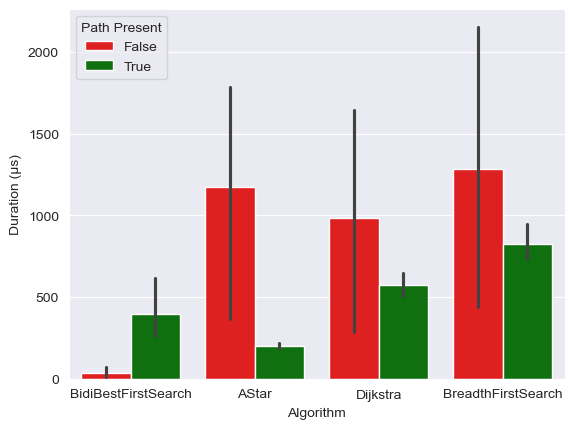

In [87]:
sns.barplot(benchmark, x='Algorithm', y='Duration (µs)', hue='Path Present', palette=['red', 'green'])

# Relationship between path length and duration

<Axes: xlabel='Path Length', ylabel='Duration (µs)'>

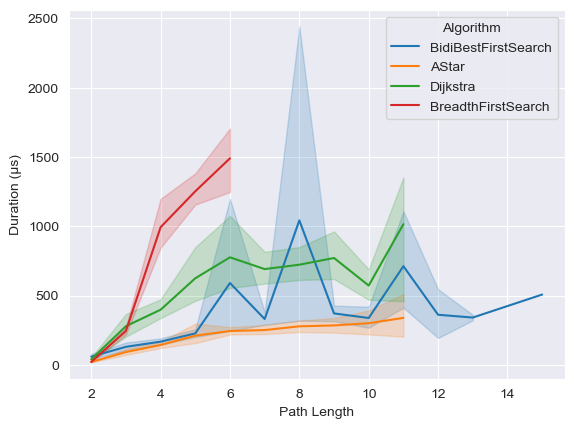

In [88]:
sns.lineplot(benchmark_path, x='Path Length', y='Duration (µs)', hue='Algorithm')

# Relationship between average path degree and duration

<Axes: xlabel='Average Path Degree', ylabel='Duration (µs)'>

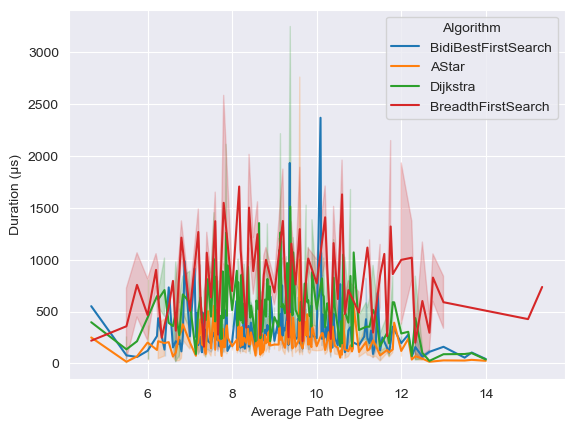

In [102]:
sns.lineplot(benchmark_path[benchmark_path['Duration (µs)'] < 10000], x='Average Path Degree', y='Duration (µs)', hue='Algorithm')

# Relationship between path length and average degree

<Axes: xlabel='Path Length', ylabel='Average Path Degree'>

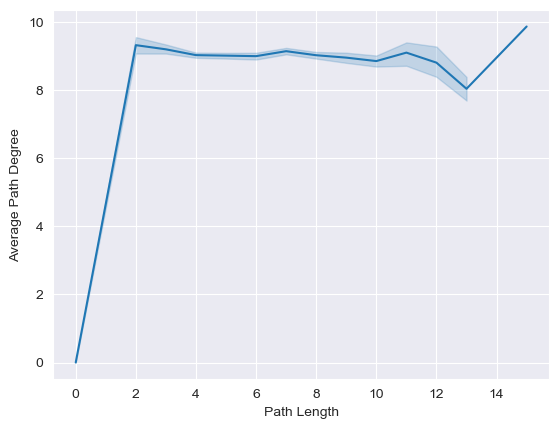

In [90]:
sns.lineplot(benchmark, x='Path Length', y='Average Path Degree')

# Distribution of durations for each algorithm

<Axes: xlabel='Duration (µs)', ylabel='Count'>

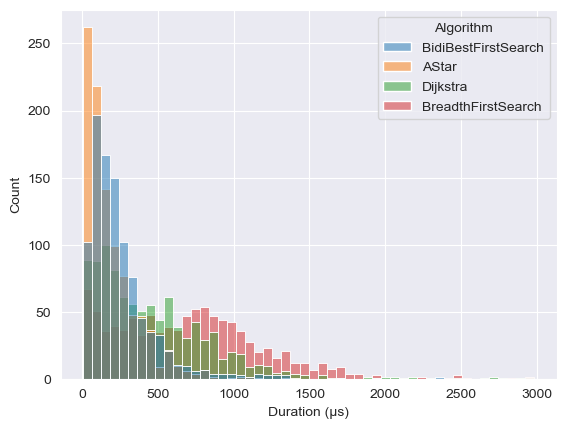

In [100]:
sns.histplot(benchmark[benchmark['Duration (µs)'] < 3000], x='Duration (µs)', hue='Algorithm')

# Correlation Heatmap

<Axes: >

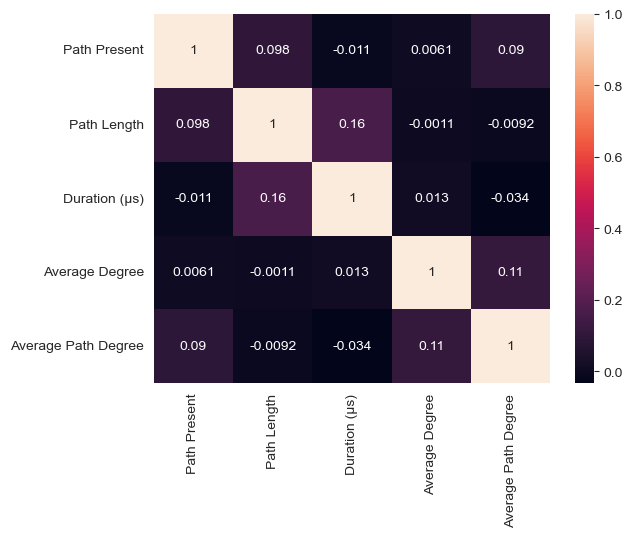

In [97]:
sns.heatmap(benchmark.corr(method='kendall', numeric_only=True), annot=True)